# Определение перспективного тарифа для телеком компании
____

## Описание проекта.
##### Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
##### В данном проекте мы сделаем предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проведём анализ поведения клиентов и сделаем вывод — какой тариф лучше.
_____ 
<a id='start'></a>

## Содержание

### Глава 1. Изучим общую информацию и откроем файл с данными 
   * <a href='#step_1.1'>Добавим описание тарифов, с которыми будем работать.</a>
   * <a href='#step_1.2'>Загружаем библиотеки и данные </a>
   * <a href='#step_1.3'>Ознакомление с данными </a>
       * <a href='#step_1.4'>Звонки</a>
       * <a href='#step_1.5'>Интернет</a>
       * <a href='#step_1.6'>Сообщения</a>
       * <a href='#step_1.7'>Тарифы</a>
       * <a href='#step_1.8'>Клиенты</a>
   * <a href='#step_1.end'>Вывод</a>

### Глава 2. Подготовливаем данные
   * <a href='#step_2.1'>Приведём данные к нужным типам</a>
   * <a href='#step_2.2'>Найдём и исправим ошибки в данных</a><br>
 Посчитаем для каждого пользователя:
       * <a href='#step_2.3'>Количество сделанных звонков и израсходованных минут разговора по месяцам</a>
       * <a href='#step_2.4'>Количество отправленных сообщений по месяцам </a>
       * <a href='#step_2.5'>Объем израсходованного интернет-трафика по месяцам</a>
       * <a href='#step_2.6'>Помесячную выручку с каждого пользователя</a>
   * <a href='#step_2.end'>Вывод</a>


### Глава 3. Проанализируем данные
   * <a href='#step_3.1'>Опишем поведение клиентов оператора, исходя из выборки</a>
   * <a href='#step_3.2'>Посчитаем среднее количество, дисперсию и стандартное отклонение</a>
       * <a href='#step_3.3'>Начнём подсчёт со среднего количества</a>
       * <a href='#step_3.4'>Посчитаем дисперсию</a> 
       * <a href='#step_3.5'>Стандартное отклонение</a>
   * <a href='#step_3.6'>Построим гистограммы и опишем распределения</a>
      
   * <a href='#step_3.end'>Вывод</a>


### Глава 4. Проверим гипотезы:
   * <a href='#step_4.1'>Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a>
   * <a href='#step_4.2'>Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a>
 
   * <a href='#step_4.end'>Вывод</a>


### Глава 5. Общий вывод
   * <a href='#step_5.end'>Вывод</a>
   ____
   ___

<a id="step_1.1"></a>
### Глава 1. Изучим общую информацию и откроем файл с данными 

#### Добавим описание тарифов, с которыми будем работать. <a id='step_1.1'></a>
##### Тариф «Смарт»
Ежемесячная плата: 550 рублей<br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика <br>
Стоимость услуг сверх тарифного пакета: <br>
минута разговора: 3 рубля<br>
сообщение: 3 рубля<br>
1 Гб интернет-трафика: 200 рублей
##### Тариф «Ультра»
Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 1 рубль<br>
сообщение: 1 рубль<br>
1 Гб интернет-трафика: 150 рублей

#### Загружаем библиотеки и данные  <a id='step_1.2'></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [ ]:
data_calls = pd.read_csv('calls.csv')
data_internet = pd.read_csv('internet.csv')
data_messages = pd.read_csv('messages.csv')
data_tariffs = pd.read_csv('tariffs.csv')
data_users = pd.read_csv('users.csv')

#### Ознакомление с данными <a id='step_1.3'></a>

##### Звонки <a id='step_1.4'></a>

In [ ]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [ ]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


##### Интернет <a id='step_1.5'></a>

In [ ]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


##### Сообщения <a id='step_1.6'></a>

In [ ]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


##### Тарифы <a id='step_1.7'></a>

In [ ]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


##### Клиенты <a id='step_1.8'></a>

In [ ]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<a id="step_1.end"></a>
### Вывод

Данные выгружены успешно, при первоначальном ознакомлении видим, что в основном данные по качесту и наполнению корректны, займёмся приведением данных к требуемым типам в след главе.

-----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_2.1"></a>
### Глава 2. Подготовливаем данные

#### Приведём данные к нужным типам

Начнём с того, что приведём в порядок тип данных в колонке с датой в таблицах Звонки, Интернет, Сообщения и Клиенты

In [ ]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] =pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] =pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

#### Найдём и исправим ошибки в данных <a id="step_2.2"></a>

Удалим лишний столбец из таблицы Интернет

In [ ]:
data_internet=data_internet.drop(columns='Unnamed: 0')
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


#### Посчитаем для каждого пользователя: <a id="step_2.3"></a>
   ##### Количество сделанных звонков и израсходованных минут разговора по месяцам


Для начала добавим столбец с месяцами в датасет со звонками

In [ ]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [ ]:
data_pivot_call=data_calls.pivot_table(index='month', values='duration', aggfunc=['count','sum'])
data_pivot_call.columns=['value_call','sum_call']

Построим график для наглядности распределения данных по месяцам

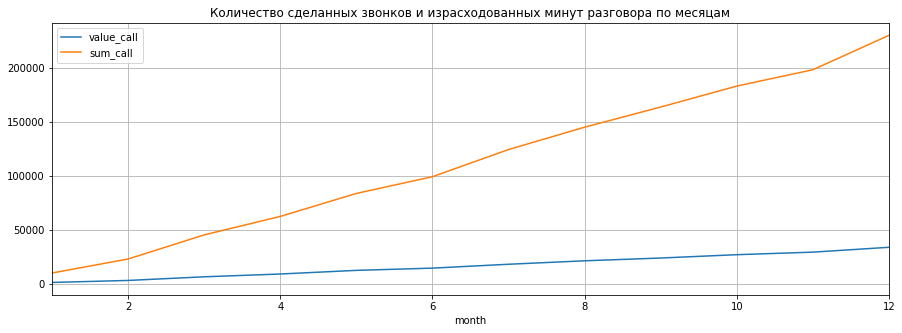

In [ ]:
data_pivot_call.plot(grid=True, title='Количество сделанных звонков и израсходованных минут разговора по месяцам',figsize=(15,5))
plt.show()

         Из графика хорошо видно, что идёт тенденция на увеличение времени разговора, т.к. количество звонков растёт с меньшей скоростью.

##### Количество отправленных сообщений по месяцам <a id="step_2.4"></a>


Добавим дополнительный столбец с месяцами в таблицу с данными по сообщениям

In [ ]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [ ]:
data_mess_pivot=data_messages.pivot_table(index='month', values='message_date', aggfunc='count')
data_mess_pivot.columns=['count_message']

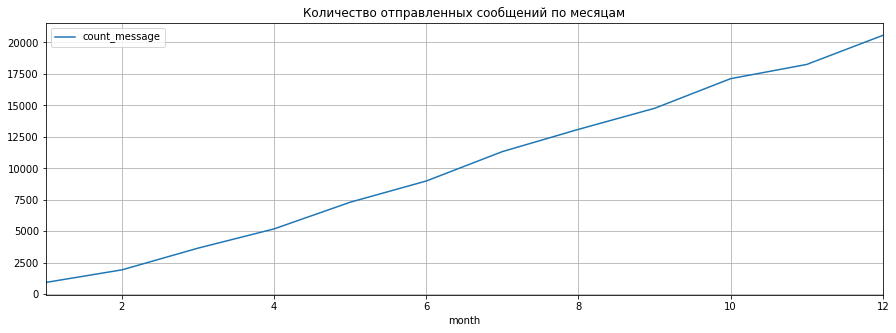

In [ ]:
data_mess_pivot.plot(grid=True, title='Количество отправленных сообщений по месяцам',figsize=(15,5))

plt.show()

        На графике виден очевидный рост по количеству ежемесячному количеству отправляемых сообщений 

##### Объем израсходованного интернет-трафика по месяцам <a id="step_2.5"></a>


Добавим дополнительный столбец с месяцами в таблицу с данными по использованию интернет-трафика

In [ ]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


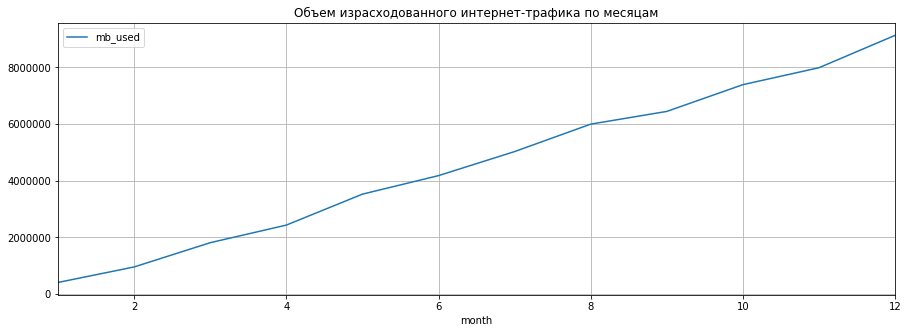

In [ ]:
data_int_pivot=data_internet.pivot_table(index='month', values='mb_used', aggfunc='sum')
data_int_pivot.plot(grid=True, title='Объем израсходованного интернет-трафика по месяцам',figsize=(15,5))

plt.show()

        На графике так же явно прослеживается рост использования траффика интернета

##### Помесячную выручку с каждого пользователя  <a id="step_2.6"></a>


####  Приведём все таблицы к одному порядку и сгруппируем по данным "user_id" и "month"

Звонки:

In [ ]:
calls=data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['sum','count'])

In [ ]:
calls.columns=['minutes','count_calls']

Округлим значения минут до целого числа в большую сторону методом np.ceil()

In [ ]:
calls=np.ceil(calls)
calls.head()

minutes  count_calls
user_id month                      
1000    5        151.0         22.0
        6        159.0         43.0
        7        319.0         47.0
        8        390.0         52.0
        9        441.0         58.0

Интернет:

In [ ]:
internet=data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum'])

In [ ]:
internet.columns=['mb_used_sum']


Выполним так же округление израсходованного трафика на интернет в большую сторону.

In [ ]:
internet=np.ceil(internet)
internet.head()

mb_used_sum
user_id month             
1000    5           2254.0
        6          23234.0
        7          14004.0
        8          14056.0
        9          14569.0

Сообщения:

In [ ]:
messages=data_messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc=['count'])

In [ ]:
messages.columns=['message_count']
messages.head()

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

Отлично, все таблицы приведены к одному формату, теперь можно начать процесс объединения данных

#### Объеденим все таблицы

In [ ]:
merge_data=pd.merge(calls,internet, on=['user_id','month'], how='left')

In [ ]:
merge_data_2=pd.merge(merge_data,messages, on=['user_id','month'], how='left')

In [ ]:
merge_data_2=merge_data_2.reset_index()

In [ ]:
merge_data_3=pd.merge(merge_data_2,data_users, on=['user_id'], how='outer')

Проверяем результат

In [ ]:
merge_data_3.head()

Отлично теперь присвоим названия столбцов, в зависимости от их содержимого

In [ ]:
data_tariffs.columns=['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

Теперь можно объеденить нашу сборную таблицу с тарифами, для удобства работы

In [ ]:
final_data=pd.merge(merge_data_3,data_tariffs, on=['tariff'], how='left')

In [ ]:
final_data.head()

Отлично, все таблицы объеденины в один датасет теперь можно приступить к расчётам. Напишем функцию, которая будет высчитывать затраты каждого пользователя на тариф и записывала их в отдельный столбец по месяцам.

In [ ]:
def func_prof(row):
    cal_p = 0
    inter_p = 0
    mess_p = 0
    
    cal = (row['minutes'] - row['minutes_included'])
    if cal > 0:
        
        cal_p = cal*row['rub_per_minute']
        return cal_p

    inter = (row['mb_used_sum']- row['mb_per_month_included'])
    
    if inter > 0:
        
        inter_p = inter*row['rub_per_gb']/1024
        return inter_p
    
    mess =  (row['message_count']-row['messages_included'])
    
    if inter > 0:
        
        mess_p = mess*row['rub_per_message']
        return mess_p
    
    mon_fee = row['rub_monthly_fee']
    
    prof = cal_p+inter_p+mess_p+mon_fee
    
    return prof
        
final_data['profit']= final_data.apply(func_prof, axis=1) 


Проверим результат

In [ ]:
final_data.head()

Сделаем выгрузку по пользователям для наглядного представления о затратах

In [ ]:
final_data.pivot_table(index=['user_id','first_name','last_name'], values='profit')

<a id="step_2.end"></a>
### Вывод

Данные приведены в одну общую сводную таблицу из которой удобно брать интересующие нас выборки, теперь можно перейти к анализу полученных данных и сделать выводы о их распределении

-----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_3.1"></a>
### Глава 3. Проанализируем данные

##### Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

Сделаем выборку по расходам пользователей и распределим их по месяцам в зависимости от оператора

In [ ]:
sum_per_mount = final_data.pivot_table(index=['tariff','month'], values=['minutes','message_count','mb_used_sum'], aggfunc='sum').round(0)
sum_per_mount.head()

mb_used_sum  message_count  minutes
tariff month                                     
smart  1.0       289482.0          620.0   6579.0
       2.0       672656.0         1397.0  16438.0
       3.0      1163058.0         2453.0  28362.0
       4.0      1507817.0         3443.0  38838.0
       5.0      2228598.0         4762.0  51565.0

Добавим столбец с количеством пользователей в каждую группу по месяцам для подсчёта среднего значения по затратам на одного пользователя в зависимости от тарифа

In [ ]:
count_users=final_data.groupby(['tariff','month'])['user_id'].count()
sum_per_mount=sum_per_mount.merge(count_users, on=['tariff','month'], how='left')

Переименуем нименования столбцов в зависимости от их содержимого 

In [ ]:
sum_per_mount.columns=['mb','message','minutes','users']

Посмотрим распределение на графике по тарифу "Smart"

In [ ]:
smart_tarif = sum_per_mount.reset_index(0).query('tariff == "smart"')
smart_tarif

,tariff,mb,message,minutes,users
month,,,,,
1.0,smart,289482.0,620.0,6579.0,34
2.0,smart,672656.0,1397.0,16438.0,58
3.0,smart,1163058.0,2453.0,28362.0,77
4.0,smart,1507817.0,3443.0,38838.0,112
5.0,smart,2228598.0,4762.0,51565.0,141
6.0,smart,2577962.0,5430.0,61283.0,163
7.0,smart,3164469.0,6784.0,77587.0,201
8.0,smart,3892583.0,7888.0,93616.0,234
9.0,smart,4221858.0,8714.0,105303.0,259


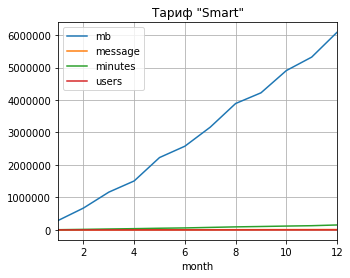

In [ ]:
smart_tarif.plot(grid=True,figsize=(5,4),title='Тариф "Smart"')
plt.show()

Посмотрим распределение на графике по тарифу "Ultra"

In [ ]:
ultra_tarif=sum_per_mount.reset_index(0).query('tariff == "ultra"')
ultra_tarif

,tariff,mb,message,minutes,users
month,,,,,
1.0,ultra,118272.0,304.0,3648.0,9
2.0,ultra,282632.0,527.0,6747.0,24
3.0,ultra,648835.0,1195.0,17130.0,37
4.0,ultra,922119.0,1727.0,23780.0,53
5.0,ultra,1259229.0,2423.0,32308.0,64
6.0,ultra,1531655.0,3244.0,38090.0,81
7.0,ultra,1799382.0,4266.0,46928.0,88
8.0,ultra,2018018.0,4930.0,51617.0,103
9.0,ultra,2119536.0,5751.0,58604.0,111


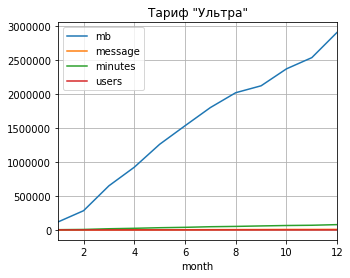

In [ ]:
ultra_tarif.plot(grid=True,figsize=(5,4),title='Тариф "Ультра"')
plt.show()

Для сравнения распределения даных объеденим их на одном графике

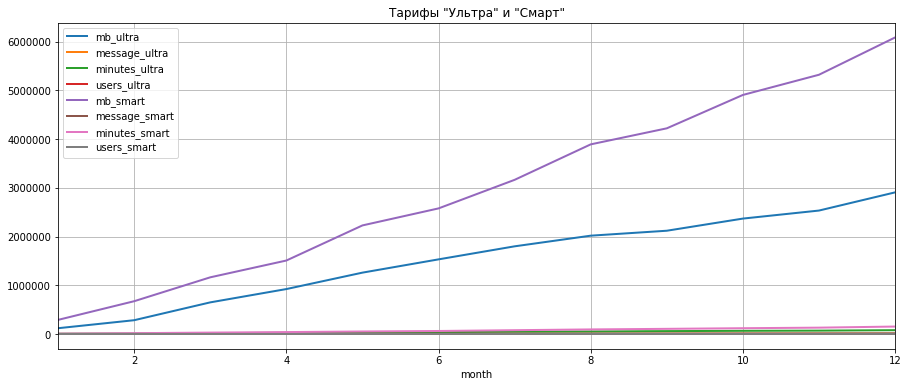

In [ ]:
ultra_tarif.join(smart_tarif,lsuffix='_ultra', rsuffix='_smart').plot(grid=True,figsize=(15,6),title='Тарифы "Ультра" и "Смарт"', linewidth=2)
plt.show()

    Вывод. Из наших распределений видно, что несмотря на то, что ежемесячное количество пользователей растёт, расход интернет-трафика у пользователе обоих тарифов растёт намного быстрее, чем смс и звонки.

####  Посчитаем среднее количество, дисперсию и стандартное отклонение <a id="step_3.2"></a>

##### Начнём подсчёт со среднего количества <a id="step_3.3"></a>

In [ ]:
count_per_mount = final_data.pivot_table(index=['tariff','month'], values=['minutes','message_count','mb_used_sum', 'profit'], aggfunc='sum').round(0)
count_per_mount.head()

mb_used_sum  message_count  minutes   profit
tariff month                                              
smart  1.0       289482.0          620.0   6579.0  19529.0
       2.0       672656.0         1397.0  16438.0  29599.0
       3.0      1163058.0         2453.0  28362.0  44087.0
       4.0      1507817.0         3443.0  38838.0  61298.0
       5.0      2228598.0         4762.0  51565.0  88324.0

Добавим столбец с подсчётом количества пользователей в отдельном месяце в нашу таблицу

In [ ]:
b=final_data.groupby(['tariff','month'])['user_id'].count()
count_per_mount=count_per_mount.merge(b, on=['tariff','month'], how='left').reset_index()

Проверим результат

In [ ]:
count_per_mount.head()

,tariff,month,mb_used_sum,message_count,minutes,profit,user_id
0,smart,1.0,289482.0,620.0,6579.0,19529.0,34
1,smart,2.0,672656.0,1397.0,16438.0,29599.0,58
2,smart,3.0,1163058.0,2453.0,28362.0,44087.0,77
3,smart,4.0,1507817.0,3443.0,38838.0,61298.0,112
4,smart,5.0,2228598.0,4762.0,51565.0,88324.0,141


Для каждого параметра вычислим расход трафика, смс и минут каждым пользователем в зависимости от месяца

In [ ]:
users_vales=count_per_mount['user_id']

count_per_mount['mb_used_sum'] = (count_per_mount['mb_used_sum']/users_vales).round()
count_per_mount['message_count'] = (count_per_mount['message_count']/users_vales).round()
count_per_mount['minutes'] = (count_per_mount['minutes'] /users_vales).round()
count_per_mount['profit'] = (count_per_mount['profit'] /users_vales).round()

Заполним нименования столбцов в зависимости от их нового содержания

In [ ]:
count_per_mount.columns=['tariff', 'month', 'mb_per_user', 'message_per_user', 'minutes_per_user','profit_per_user', 'user_value']
count_per_mount

,tariff,month,mb_per_user,message_per_user,minutes_per_user,profit_per_user,user_value
0,smart,1.0,8514.0,18.0,194.0,574.0,34
1,smart,2.0,11598.0,24.0,283.0,510.0,58
2,smart,3.0,15105.0,32.0,368.0,573.0,77
3,smart,4.0,13463.0,31.0,347.0,547.0,112
4,smart,5.0,15806.0,34.0,366.0,626.0,141
5,smart,6.0,15816.0,33.0,376.0,591.0,163
6,smart,7.0,15744.0,34.0,386.0,625.0,201
7,smart,8.0,16635.0,34.0,400.0,657.0,234
8,smart,9.0,16301.0,34.0,407.0,612.0,259
9,smart,10.0,16748.0,34.0,404.0,655.0,293


Вычислим среднее количество использования данных двух тарифов каждым пользователем и усреднённые затраты на связь за 2018 год

Для удобства данные отобразим в сводной таблице

In [ ]:
count_per_mount.pivot_table(index='tariff', values=['mb_per_user','message_per_user','minutes_per_user','profit_per_user'], aggfunc='mean')

,mb_per_user,message_per_user,minutes_per_user,profit_per_user
tariff,,,,
smart,15061.750000,31.5,366.416667,605.166667
ultra,18248.333333,43.5,483.083333,1811.500000


    Вывод. Таким образом исходя из среднего распределения мы видим, что затраты на связь абонентами "Ultra" выше чем у абонентов использующих тарифный план "Smart" при приблизительно том же объёме использовании ресурсов связи

##### Посчитаем дисперсию <a id="step_3.4"></a>

Тариф "Smart"

In [ ]:
count_per_mount_s = count_per_mount.query('tariff == "smart"')

s_disp_mb=np.var(count_per_mount_s['mb_per_user'])
s_disp_ms=np.var(count_per_mount_s['message_per_user'])
s_disp_min=np.var(count_per_mount_s['minutes_per_user'])
s_disp_prof=np.var(count_per_mount_s['profit_per_user'])

print('Дисперсия израсходованного интернет трафика равна', s_disp_mb)
print( 'Дисперсия израсходованных сообщений равна', s_disp_ms)
print('Дисперсия израсходованных минут равна', s_disp_min)
print('Дисперсия затраченных средств на связь равна', s_disp_prof)

Дисперсия израсходованного интернет трафика равна 6546893.354166667
Дисперсия израсходованных сообщений равна 24.916666666666668
Дисперсия израсходованных минут равна 4289.743055555556
Дисперсия затраченных средств на связь равна 2002.8055555555557


Тариф "Ultra"

In [ ]:
count_per_mount_u = count_per_mount.query('tariff == "ultra"')

u_disp_mb=np.var(count_per_mount_u['mb_per_user'])
u_disp_ms=np.var(count_per_mount_u['message_per_user'])
u_disp_min=np.var(count_per_mount_u['minutes_per_user'])
u_disp_prof=np.var(count_per_mount_u['profit_per_user'])

print('Дисперсия израсходованного интернет трафика равна',u_disp_mb)
print( 'Дисперсия израсходованных сообщений равна',u_disp_ms)
print('Дисперсия израсходованных минут равна',u_disp_min)
print('Дисперсия затраченных средств на связь равна', u_disp_prof)

Дисперсия израсходованного интернет трафика равна 8015663.722222223
Дисперсия израсходованных сообщений равна 135.25
Дисперсия израсходованных минут равна 5861.909722222223
Дисперсия затраченных средств на связь равна 2728.75


##### Стандартное отклонение <a id="step_3.5"></a>

Тариф "Smart"

In [ ]:
s_std_mb=np.std(count_per_mount_s['mb_per_user'], ddof=1)
s_std_ms=np.std(count_per_mount_s['message_per_user'], ddof=1)
s_std_min=np.std(count_per_mount_s['minutes_per_user'], ddof=1)
s_std_prof=np.std(count_per_mount_s['profit_per_user'], ddof=1)

print('Стандартное отклонение израсходованного трафика равно',s_std_mb)
print('Стандартное отклонение израсходованных сообщений равно',s_std_ms)
print('Стандартное отклонение израсходованных минут равно',s_std_min)
print('Стандартное отклонение затраченных средств на связь равно',s_std_prof)

Стандартное отклонение израсходованного трафика равно 2672.464307951133
Стандартное отклонение израсходованных сообщений равно 5.213618530523516
Стандартное отклонение израсходованных минут равно 68.4084767917668
Стандартное отклонение затраченных средств на связь равно 46.742686998917684


Для полноты понимания о распределении значений затрат на связь по тарифу "Smart" вычислим распределение 3-сигм

In [ ]:
mu_s=count_per_mount_s['profit_per_user'].mean()
IIIG_profit_s = (s_std_prof*3)+mu_s
IIIG_profit_s

745.3947276634196

#### Вычислим какова вероятность попасть между значений средних затрат на связь при использовании тарифа "Smart"

In [ ]:
distr_s = st.norm(mu_s,s_std_prof)
x2_s=mu_s+s_std_prof
x1_s=mu_s-s_std_prof

result_s=distr_s.cdf(x2_s)-distr_s.cdf(x1_s)
print('Вероятность попасть в диапазон затрат между {:.2f}р и {:.2f}р на тарифе "Смарт" равна {:.0%}'.format(x1_s,x2_s,result_s))

Вероятность попасть в диапазон затрат между 558.42р и 651.91р на тарифе "Смарт" равна 68%


Тариф "Ultra"

In [ ]:
u_std_mb=np.std(count_per_mount_u['mb_per_user'], ddof=1)
u_std_ms=np.std(count_per_mount_u['message_per_user'], ddof=1)
u_std_min=np.std(count_per_mount_u['minutes_per_user'], ddof=1)
u_std_prof=np.std(count_per_mount_u['profit_per_user'], ddof=1)

print('Стандартное отклонение израсходованного трафика равно',u_std_mb)
print('Стандартное отклонение израсходованных сообщений равно',u_std_ms)
print('Стандартное отклонение израсходованных минут равно',u_std_min)
print('Стандартное отклонение затраченных средств на связь равно',u_std_prof)

Стандартное отклонение израсходованного трафика равно 2957.0864756111587
Стандартное отклонение израсходованных сообщений равно 12.146828991364558
Стандартное отклонение израсходованных минут равно 79.96755971055143
Стандартное отклонение затраченных средств на связь равно 54.5602252727954


Для полноты понимания о распределении значений затрат на связь по тарифу "Ultra" вычислим распределение 3-сигм

In [ ]:
mu=count_per_mount_u['profit_per_user'].mean()
IIIG_profit = (u_std_prof*3)+mu
IIIG_profit

1975.1806758183861

#### Вычислим какова вероятность попасть между значений средних затрат на связь при использовании тарифа "Ultra"

In [ ]:
distr = st.norm(mu,u_std_prof)
x2=mu+u_std_prof
x1=mu-u_std_prof

In [ ]:
result=distr.cdf(x2)-distr.cdf(x1)
print('Вероятность попасть в диапазон затрат между {:.2f}р и {:.2f}р на тарифе "Ultra" равна {:.0%}'.format(x1,x2,result))

Вероятность попасть в диапазон затрат между 1756.94р и 1866.06р на тарифе "Ultra" равна 68%


#### Построим гистограммы и опишем распределения <a id="step_3.6"></a>

Пострим сравнительные гистограммы распределиения затрат пользователей на тариф "Ultrs" и "Smart"

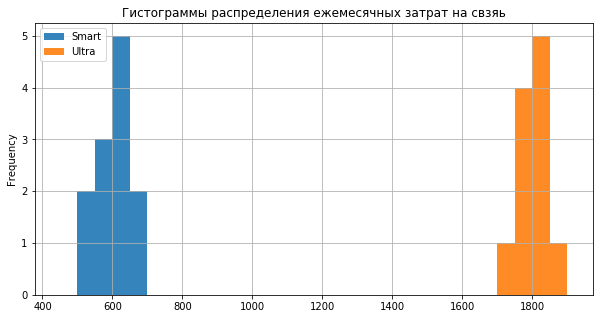

In [ ]:
bins=[450,500,550,600,650,700,750,800,850,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900]
ax=count_per_mount_s['profit_per_user'].plot(kind='hist',bins=bins,alpha=0.9,grid=True, label='Smart', legend=True)
count_per_mount_u['profit_per_user'].plot(kind='hist',bins=bins, alpha=0.9, grid=True, title="Гистограммы распределения ежемесячных затрат на свзяь", label='Ultra', legend=True, figsize=(10,5))

plt.show()

<a id="step_3.end"></a>
### Вывод

При проверке дисперсии и среднего значения по двум тарифам можно сделать вывод, что данные по использованию internet-трафика и звонков отличаются не значительно, за исключением распределения дисперсии и сркднего занчения по затратам на использование связи и расхода смс. Из гистограммы распределения ежемесячных затрат на свзяь мы видим нормальное распределение данных. Проверм гипотезы о разнице затарт на связь в следующей главе.

----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_4.1"></a>
### Глава 4. Проверим гипотезы

#### Cредняя выручка пользователей тарифов «Ultra» и «Smart» различается

Если у нас стоит задача выяснить, различаются ли между собой выручки по тарифам, то нулевая гипотеза будет звучать так - выручка пользователей тарифа "Ultra" равна выручке пользователй тарифа "Smart", а альтернативная гипотеза - нет выручки двух тарифов не равны. Попробуем доказать нулевую гипотезу при помощи критерия, учитывающего равенство средних двух выборок из генеральных совокупностей. Для этого используем t-test

Произведём выборку по неусреднённым данным ежемесячных затрат пользователей на связь 

In [ ]:
table=final_data.pivot_table(index=['tariff','month'], values='profit', aggfunc='sum').round(0)
table=table.reset_index(0)

In [ ]:
table_smart=table.query('tariff == "smart"')
table_ultra=table.query('tariff == "ultra"')

Для наглядности визуализируем наши выборки

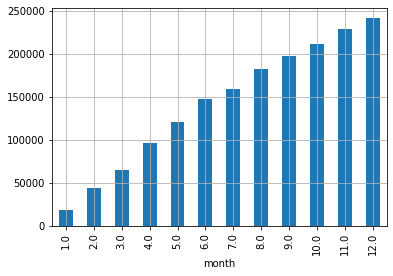

In [ ]:
table_ultra['profit'].plot(kind='bar',grid=True)
plt.show()

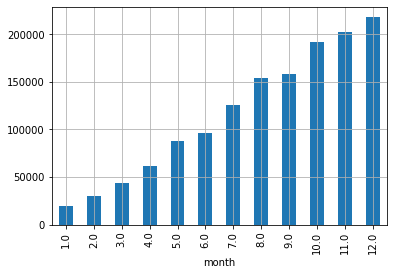

In [ ]:
table_smart['profit'].plot(kind='bar',grid=True)
plt.show()

Проверм дисперсии выборок, чтобы корректно определить параметр equal_var

In [ ]:
dispers_smart= np.var(table_smart['profit'])
dispers_ultra= np.var(table_ultra['profit'])
print('Дисперсия для выборки затрат на связь по тарифу "Smart" равна', dispers_smart )
print('Дисперсия для выборки затрат на связь по тарифу "Ultra" равна', dispers_ultra )

Дисперсия для выборки затрат на связь по тарифу "Smart" равна 4422838991.909722
Дисперсия для выборки затрат на связь по тарифу "Ultra" равна 5103001344.083333


Дисперсии отличаются друг от друга не значительно, а так же у нас есть основание полагать, что выборки взяты из схожих по параметрам совокупностей по-этому укажем параметр equal_var = True.

In [ ]:
sample_1 = table_smart['profit']
sample_2 = table_ultra['profit']

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var=True)

print('p-значение: ',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.37389111898437355
Не получилось отвергнуть нулевую гипотезу


Таким образом мы пришли к выводу о том, что эмпирически полученные данные укладываются в уровень значимости и можно сичтать, что средние выборки по двум тарифам очень близки другу, но это не говорит о том какая из выборок больше или меньше, для этого свормулируем ещё одну гипотезу.

In [ ]:
# Напишем функцию для удаления выбросов

def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

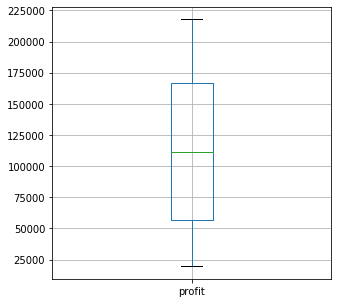

In [ ]:
delete_outliers(table_smart,'profit',1,5,5)

Сформулируем ещё одну гипотезу как одностороннюю (возьмём её за нулевую), звучать она будет так - средняя выручка пользователей тарифов «Smart» меньше средней выручки тарифа «Ultra», тогда альтренативная гипотеза будет -  нет средняя выручка пользователей тарифов «Smart» не меньше средней выручки тарифа «Ultra». За среднюю величину(prev_screens_value) сравниваемого значения возьмём среднее по выборке тарифа "Smart"

In [ ]:
screens = table_ultra['profit']
prev_screens_value = table_smart['profit'].mean()

alpha = .05

results_a = st.ttest_1samp(
    screens, 
    prev_screens_value)

print('p-значение: ', results_a.pvalue / 2)

if results_a.pvalue / 2 < alpha and screens.mean() < prev_screens_value:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.12036627343079608
Не получилось отвергнуть нулевую гипотезу


    Вывод. Отлично мы смогли доказать гипотезу о том, что средняя выручка на тарифе «Smart» не отличается от средней выручки тарифа «Ultra и укладывается в уровень значимости 5%. А так же сформулировав гипотезу о направелнности незначительного различия доказали, что средняя выручка на тарифе «Smart» меньше средней выручки тарифа «Ultra

#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов <a id="step_4.2"></a>


Выполним разбивку по двум параметрам из общей таблицы пользователи в "Москве" и "в других регионах"

In [ ]:
mean_profit_m = final_data.query('city == "Москва"').pivot_table(index=['user_id'], values='profit', aggfunc='sum')
mean_profit_o = final_data.query('city != "Москва"').pivot_table(index=['user_id'], values='profit', aggfunc='sum')

Среднее значение по затратам для пользователей в Москве

In [ ]:
mean_profit_m['profit'].mean()

6282.495679450758

Посчитаем дисперсию и стандартное отклонение

In [ ]:
disp_m=np.var(mean_profit_m['profit'])
std_m=np.std(mean_profit_m['profit'], ddof=1)

print('Дисперсия затрат пользователей в Москве равна', disp_m)
print('Стандартное отклонение затрат пользователей в Москве равно',std_m)

Дисперсия затрат пользователей в Москве равна 31054557.17571106
Стандартное отклонение затрат пользователей в Москве равно 5601.021372231846


Среднее занчение по расходам для пользователей в других регионах

In [ ]:
mean_profit_o['profit'].mean()

6211.470863855985

Посчитаем дисперсию и стандартное отклонение

In [ ]:
disp_o=np.var(mean_profit_o['profit'])
std_o=np.std(mean_profit_m['profit'], ddof=1)

print('Дисперсия затрат пользователей в др.регионах равна', disp_o)
print('Стандартное отклонение затрат пользователей в др.регионах равно',std_o)

Дисперсия затрат пользователей в др.регионах равна 29617235.557517283
Стандартное отклонение затрат пользователей в др.регионах равно 5601.021372231846


Перейдём к гипотезе о различночти выручки в зависимости от города проживания.
Нулевая гипотеза - никаких различий от города проживания нет
Альтернативная гипотеза - средняя выручка в Москве отличается от средней выручки по другим регионам

In [ ]:
moscow_1 = mean_profit_m['profit']
other_2 = mean_profit_o['profit']

alpha = .05 

result_test = st.ttest_ind(
    moscow_1, 
    other_2, equal_var=False)

print('p-значение: ',result_test.pvalue)

if result_test.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.9097129434501013
Не получилось отвергнуть нулевую гипотезу


Таким образом полученное значение P - говорит нам о том,  что средняя выручка пользователей из Москвы и пользователей из других регионов неодинакова, но с вероятностью почти в 90% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о различии между средними выручками.

<a id="step_4.end"></a>
### Вывод

Исходя из полученных данных и выполненных проверок гипотез о различии выручек пользователей тарифов «Ultra» и «Smart» и  отличии средней выручки пользователей из Москвы от выручки пользователей из других регионов можно сделать вывод, что однозначно гипотеза о  различности средней выручки между тарифами имеет право на существование, но различия между ними не существенны и мы смогли доказать обратное. А гипотеза о том, что в среднем выручка пользователей из Москвы отличается от выручки пользователей из других регионов не доказана не смотря на небольшое отличие в сторону пользователей из Москвы, т.к. очень велика вероятность получить такое распределение выручки случайно.

----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_5.end"></a>
### Глава 5. Общий вывод

Перед нами стояла задача сделать предварительный анализ тарифов на небольшой выборке клиентов. Мы использовали данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. А так же проанализировать поведение клиентов и сделать вывод — какой тариф приносит больше денег федеральному оператору сотовой связи - «Мегалайн».</br>

Исходя из проанализированных данных из вверенной нам выборки и анализа распределения величины использования ресурсов каждого тарифа (смс, интеренет, звонки), можно однозначно сделать вывод о том, что поведение клиентов различных тарифов очень сходятся, с небольшим перевесом в сторону пользователей тарифа "Ultra". При том, что средняя стоимость использования тарифа "Ultra" выше на 33%, чем средняя стоимость использования тарифа "Smart". По распределению средней выручки в завсимости от региона использования, так же можно сделать вывод, что затраты на связь не зависят от региона использования. </br>

В итоговом заключении можно рекомендовать коммерческому департаменту, скорректировать рекламный бюджет в сторону тарифа "Smart", т.к. по тарифному плану "Ultra" приток выручки намного выше и без рекламных инвестиций при том же объёме использования средств связи, а это говорит, о том что такой тариф выбирают пользователи, которые готовы переплачивать за связь вне зависимости от ежемесячного использования включенных пакетов, такое поведение характерно организациям и бизнесу, а занчит затраты на рекламу могут не принести желаемого результата.